In [2]:
#import dependencies

import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#Read and load the crypto_data.csv

file_path = "crypto_data.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
#filter the crytpocurrencies which are not being traded.

df = df.loc[df['IsTrading'] == True, :]

In [5]:
#remove the 'IsTrading' column from the dataset

df = df.drop(['IsTrading'], axis=1)

In [6]:
#drop any row with at least on null value

df = df.dropna(how='any')

In [7]:
df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [8]:
# convert the datatype of TotalCoinSupply 

df['TotalCoinSupply'] = pd.to_numeric(df['TotalCoinSupply'])

In [9]:
# remove the rows with 0 TotalCoinsMined

df = df.loc[df['TotalCoinsMined'] > 0, :]

In [10]:
df.CoinName

0           42 Coin
2           404Coin
5         EliteCoin
7           Bitcoin
8          Ethereum
           ...     
1238         ZEPHYR
1242        Gapcoin
1245         Beldex
1246        Horizen
1247    BitcoinPlus
Name: CoinName, Length: 532, dtype: object

In [11]:
# create a new dataFrame for the Coin Names

coinName_df = pd.DataFrame(df.CoinName)
coinName_df.head()

,CoinName
0,42 Coin
2,404Coin
5,EliteCoin
7,Bitcoin
8,Ethereum


In [12]:
# removed the columns 'Unnamed: 0' and 'CoinName' from the dataframe

df =  df.drop(['Unnamed: 0', 'CoinName'], axis=1)

In [13]:
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
8,Ethash,PoW,1.076842e+08,0.000000e+00


In [14]:
coin_dum = pd.get_dummies(df)

In [15]:
coin_dum.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(coin_dum)
scaled_data

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.90)
id_pca = pca.fit_transform(scaled_data)
id_pca.shape

(532, 74)

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=500)

tsne_features = tsne.fit_transform(id_pca)
tsne_features.shape

df_pca = pd.DataFrame(id_pca)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.266896e-11,-1.619756e-14,1.854802e-14,-0.007129,-1.319756,-0.051813,...,-2.943328e-17,-1.628190e-15,-4.185189e-16,8.794398e-16,-9.284059e-16,-1.851279e-16,-4.030770e-15,-3.517208e-15,-3.120659e-16,-2.207235e-15
1,-0.318434,1.032331,-0.591126,0.001386,-1.256567e-11,-1.603305e-14,1.875772e-14,-0.007739,-1.322514,-0.056674,...,-3.750933e-16,-2.249261e-15,-1.368878e-15,1.726122e-15,-7.743451e-16,-1.363041e-16,-5.475716e-15,-3.691386e-15,8.498541e-17,-2.698160e-15
2,2.305468,1.656383,-0.683617,0.004731,-4.292765e-11,-1.779318e-14,3.663700e-14,-0.054781,-1.542879,-0.943951,...,-2.069765e-14,5.059999e-14,1.297215e-14,-4.743833e-14,-2.156463e-14,3.995776e-15,6.108146e-14,1.079485e-14,1.831510e-15,1.019114e-13
3,-0.145184,-1.320593,0.192813,-0.001229,1.114521e-11,4.272979e-15,-8.915563e-15,-0.002071,0.281463,0.251862,...,-4.594302e-15,7.090820e-15,6.383691e-15,-4.074385e-15,-8.289274e-15,6.411749e-15,3.022296e-15,4.236852e-15,-3.298000e-15,9.484947e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.547472e-11,9.087760e-15,-1.582915e-14,0.027735,0.519099,0.188820,...,8.779275e-15,3.361138e-14,2.896883e-14,-6.970282e-14,-1.745972e-13,1.138857e-13,2.130554e-14,7.910416e-14,-4.658741e-14,2.998087e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,7.469382e-11,1.373485e-14,5.214148e-14,-0.851713,2.041159,3.560713,...,-6.028526e-15,1.025936e-14,9.835385e-15,-5.659887e-15,-1.068037e-14,8.028747e-15,5.491601e-15,2.076232e-15,2.003773e-16,8.882152e-15
528,-0.333144,1.032071,-0.590740,0.001399,-1.269009e-11,-1.610787e-14,1.861147e-14,-0.007154,-1.320125,-0.052460,...,-3.419452e-17,-1.951086e-15,-4.040185e-16,6.227976e-16,-1.116761e-15,-3.707531e-16,-4.307156e-15,-3.479313e-15,-4.017781e-16,-2.058160e-15
529,0.324349,-2.312308,0.421515,-0.001319,1.195889e-11,9.762035e-15,-1.529400e-14,0.017309,0.161077,-0.047787,...,1.116177e-15,1.078039e-14,6.499851e-15,1.220477e-14,-2.417423e-14,5.197270e-14,-2.424638e-14,1.281591e-14,-2.037092e-14,6.786172e-15
530,-0.149364,-2.049336,0.412968,-0.001745,1.582385e-11,9.979243e-15,-1.881003e-14,0.028954,0.544389,0.233373,...,-9.433959e-16,-3.361075e-18,2.101432e-15,-6.191550e-16,-1.209294e-15,-2.465054e-15,-1.747877e-15,-6.644213e-16,-5.288570e-16,-1.607669e-15


In [ ]:
x_pca = df_pca['x']
y_pca = df_pca['y']

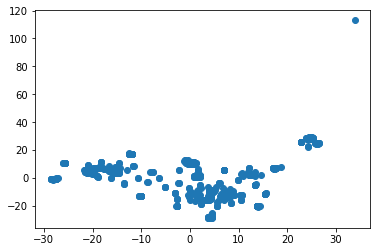

In [23]:
x_pca = tsne_features[:, 0]

y_pca = tsne_features[:, 1]

plt.scatter(df_pca['x'], df_pca['y'])
plt.show()

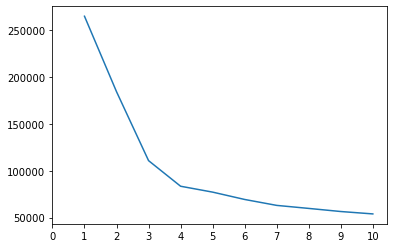

In [24]:
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters = i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))

plt.show()

In [27]:
model = KMeans(n_clusters=4, random_state=0)

model.fit(df_pca)

predictions = model.predict(df_pca)

predictions

array([3, 3, 3, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 3, 1, 0, 3, 3, 0, 0,
       2, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 3, 1, 0, 1, 2, 0, 0, 0, 3, 0, 0, 1, 0, 2, 1, 3, 0,
       2, 0, 3, 0, 3, 3, 3, 0, 0, 0, 1, 1, 2, 0, 2, 3, 1, 2, 2, 2, 1, 3,
       3, 0, 0, 0, 0, 1, 0, 2, 3, 3, 0, 0, 0, 1, 0, 2, 3, 0, 1, 0, 3, 0,
       1, 0, 3, 3, 0, 0, 1, 0, 1, 0, 3, 0, 0, 0, 2, 0, 1, 3, 1, 0, 2, 3,
       1, 1, 0, 0, 1, 0, 3, 0, 2, 3, 1, 2, 3, 0, 0, 2, 1, 0, 2, 2, 3, 3,
       1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 2, 3, 1, 0, 1, 3, 3, 3,
       3, 1, 1, 0, 1, 3, 0, 2, 2, 1, 3, 0, 3, 0, 1, 2, 0, 0, 3, 1, 3, 1,
       0, 1, 3, 3, 1, 3, 0, 0, 1, 1, 0, 1, 3, 1, 1, 3, 3, 1, 1, 1, 2, 3,
       1, 3, 3, 1, 0, 3, 1, 3, 3, 3, 1, 0, 0, 0, 3, 2, 1, 3, 1, 3, 0, 1,
       0, 0, 3, 1, 0, 3, 0, 0, 1, 0, 1, 3, 1, 0, 1, 1, 3, 1, 1, 3, 3, 3,
       2, 1, 0, 1, 2, 1, 3, 3, 2, 0, 1, 0, 3, 0, 0, 0, 0, 3, 1, 3, 3, 0,
       3, 0, 1, 1, 3, 0, 3, 0, 0, 3, 1, 1, 3, 2, 1,

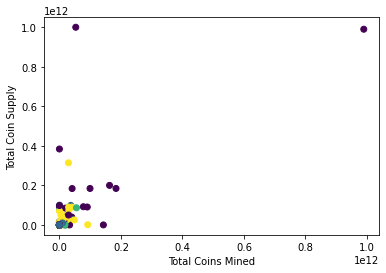

In [28]:
import numpy as np

df['class'] = predictions

plt.scatter(x=df["TotalCoinsMined"], y=df["TotalCoinSupply"],c=df['class'])
plt.xlabel('Total Coins Mined')
plt.ylabel('Total Coin Supply')

plt.show()

In [29]:
new_df = df[["TotalCoinsMined","TotalCoinSupply","class"]]

In [30]:
from scipy import stats
z_scores = stats.zscore(new_df)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df2 = new_df[filtered_entries]

new_df2

,TotalCoinsMined,TotalCoinSupply,class
0,4.199995e+01,4.200000e+01,3
2,1.055185e+09,5.320000e+08,3
7,1.792718e+07,2.100000e+07,2
8,1.076842e+08,0.000000e+00,0
9,6.303924e+07,8.400000e+07,0
...,...,...,...
1238,2.000000e+09,2.000000e+09,2
1242,1.493105e+07,2.500000e+08,3
1245,9.802226e+08,1.400223e+09,0
1246,7.296538e+06,2.100000e+07,0


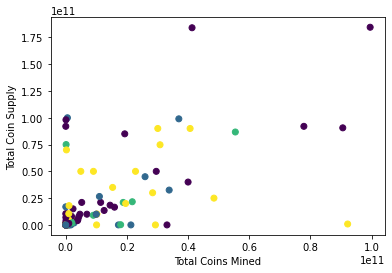

In [31]:

import numpy as np
df['class'] = predictions


plt.scatter(x=new_df2["TotalCoinsMined"], y=new_df2["TotalCoinSupply"],c=new_df2['class'])
plt.xlabel('Total Coins Mined')
plt.ylabel('Total Coin Supply')

plt.show()